In [ ]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Images/'

In [ ]:
import os
print(os.path)

glasses_dir = os.path.join(path, 'glasses/')
noglass_dir = os.path.join(path, 'no_glasses/')

<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>


In [ ]:
glass_img = os.listdir(glasses_dir)
print(glass_img[:10])
noglass_img = os.listdir(noglass_dir)
print(noglass_img[:10])

['face-3736.jpg', 'face-3936.jpg', 'face-3729.jpg', 'face-3792.jpg', 'face-3741.jpg', 'face-406.jpg', 'face-3772.jpg', 'face-3938.jpg', 'face-4044.jpg', 'face-4038.jpg']
['face-3295.jpg', 'face-3104.jpg', 'face-3046.jpg', 'face-3086.jpg', 'face-3269.jpg', 'face-3169.jpg', 'face-3055.jpg', 'face-3084.jpg', 'face-319.jpg', 'face-2943.jpg']


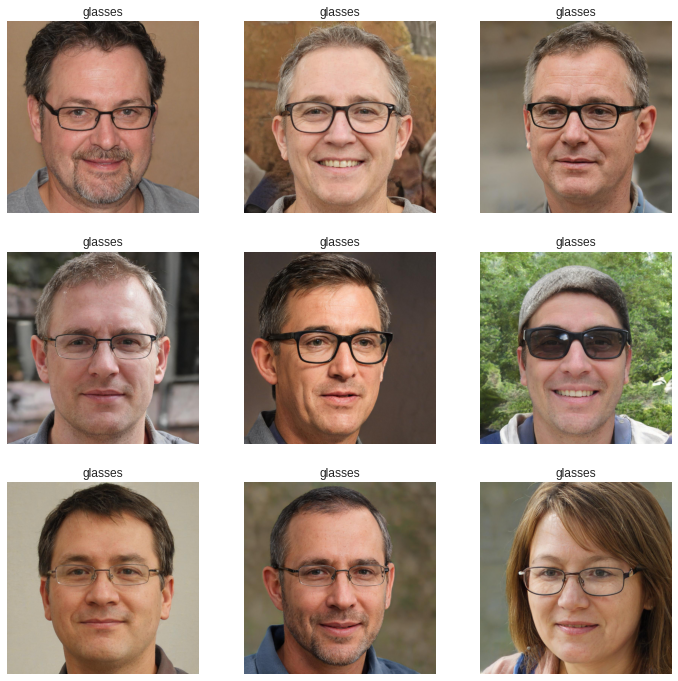

In [ ]:
import random
import matplotlib.image as mpimg
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(glass_img))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    img = mpimg.imread(glasses_dir+glass_img[ran_num[i]])
    plt.imshow(img)
    plt.title("glasses")
    plt.axis("off")

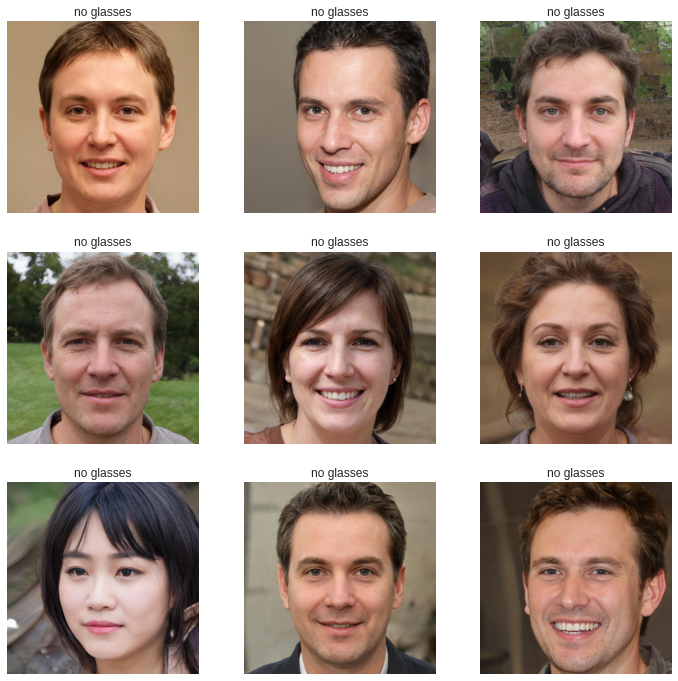

In [ ]:
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(noglass_img))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    img = mpimg.imread(noglass_dir+noglass_img[ran_num[i]])
    plt.imshow(img)
    plt.title("no glasses")
    plt.axis("off")

In [ ]:
print(len(glass_img))
print(len(noglass_img))

2779
2151


In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
train = tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.3,subset="training",shuffle=True,seed=42,image_size= (160,160),batch_size=32)

Found 4930 files belonging to 2 classes.
Using 3451 files for training.


In [ ]:
train

<BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
test= tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.3,subset="validation",shuffle=True,seed=42,image_size= (160,160),batch_size=32)

Found 4930 files belonging to 2 classes.
Using 1479 files for validation.


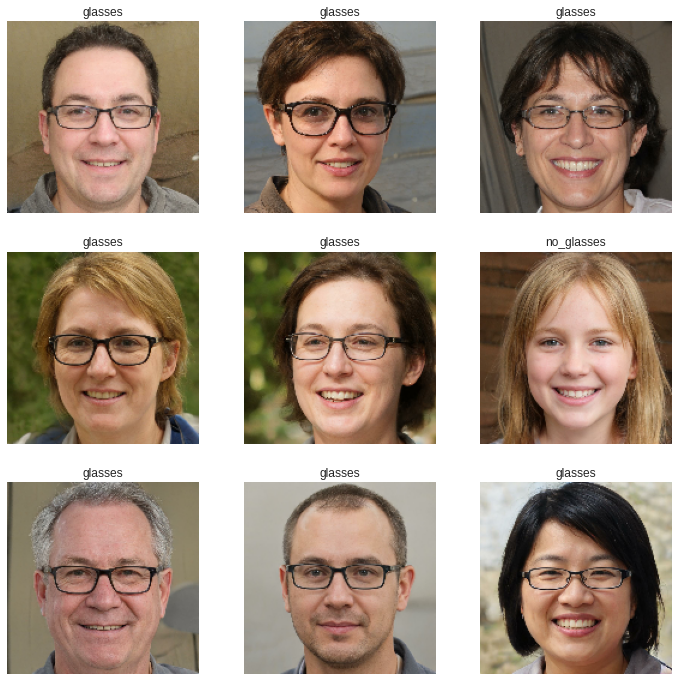

In [ ]:
class_names = train.class_names

plt.figure(figsize=(12, 12))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
model = VGG16(weights='imagenet', include_top=False)
model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [ ]:
data = []
for i in glass_img:
  data.append(glasses_dir+i)
for i in noglass_img:
  data.append(noglass_dir+i)

In [ ]:
vgg16_feature_list = []

for idx, img in enumerate(data):
        img = image.load_img(img, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)

        vgg16_feature = model.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list.append(vgg16_feature_np.flatten())
        
# vgg16_feature_list_np = np.array(vgg16_feature_list)

In [ ]:
vgg16_feature_list_np = np.array(vgg16_feature_list)

In [ ]:
vgg16_feature_list_np

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  1.5947025,
         7.5819726],
       [ 0.       ,  0.       ,  0.       , ..., 17.255802 , 16.76843  ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       , 21.707134 ,
         2.6423752],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  7.08973  ,
         3.814312 ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  1.5839617,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  5.305273 , 10.851167 ,
         0.       ]], dtype=float32)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(vgg16_feature_list_np)


In [ ]:
kmeans.cluster_centers_

array([[ 0.0114935 ,  0.01572327,  0.21716543, ...,  1.9938818 ,
         5.2872086 ,  2.4942782 ],
       [ 0.01195301,  0.02416662,  0.11863589, ...,  1.9859877 ,
        10.981363  ,  3.356407  ]], dtype=float32)

In [ ]:
labels = kmeans.labels_

In [ ]:
from sklearn import metrics
metrics.silhouette_score(vgg16_feature_list_np, labels, metric='euclidean')

0.058757324